[*********************100%%**********************]  11 of 11 completed


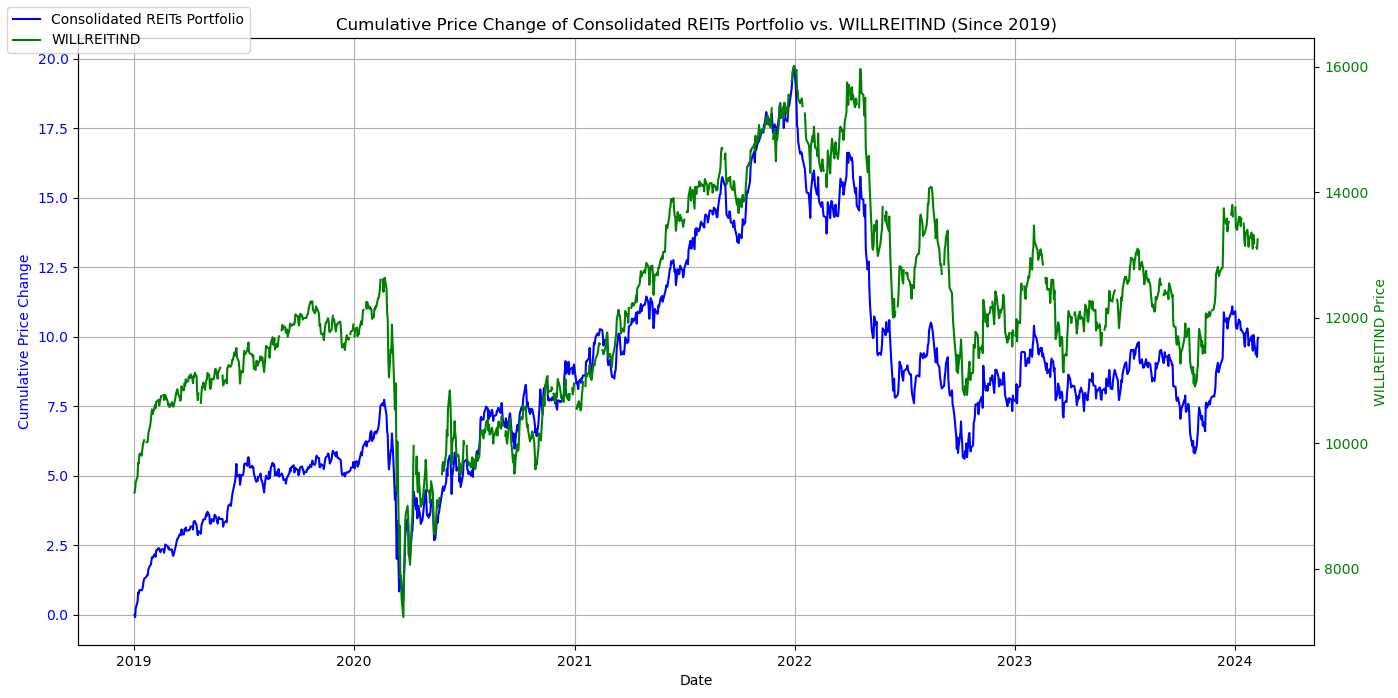

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import yfinance as yf

# Initialize Fred API with your API key
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')

# List of REIT tickers
reit_tickers = ['PLD', 'ILPT', 'PLYM', 'IIPR', 'LXP', 'TRNO', 'STAG', 'FR', 'EGP', 'COLD', 'REXR']

# Download historical data for each REIT
reit_data = yf.download(reit_tickers, start='2019-01-01')['Adj Close']

# Calculate cumulative returns for each REIT
cumulative_returns = (reit_data / reit_data.iloc[0] - 1).sum(axis=1)

# Fetch WILLREITIND data from FRED
willreitind_data = fred.get_series('WILLREITIND', observation_start='2019-01-01')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot cumulative returns of consolidated REITs portfolio
ax1.plot(cumulative_returns.index, cumulative_returns, color='blue', label='Consolidated REITs Portfolio')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Price Change', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for WILLREITIND
ax2 = ax1.twinx()
ax2.plot(willreitind_data.index, willreitind_data, color='green', label='WILLREITIND')
ax2.set_ylabel('WILLREITIND Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title('Cumulative Price Change of Consolidated REITs Portfolio vs. WILLREITIND (Since 2019)')
fig.tight_layout()
fig.legend(loc='upper left')

plt.show()


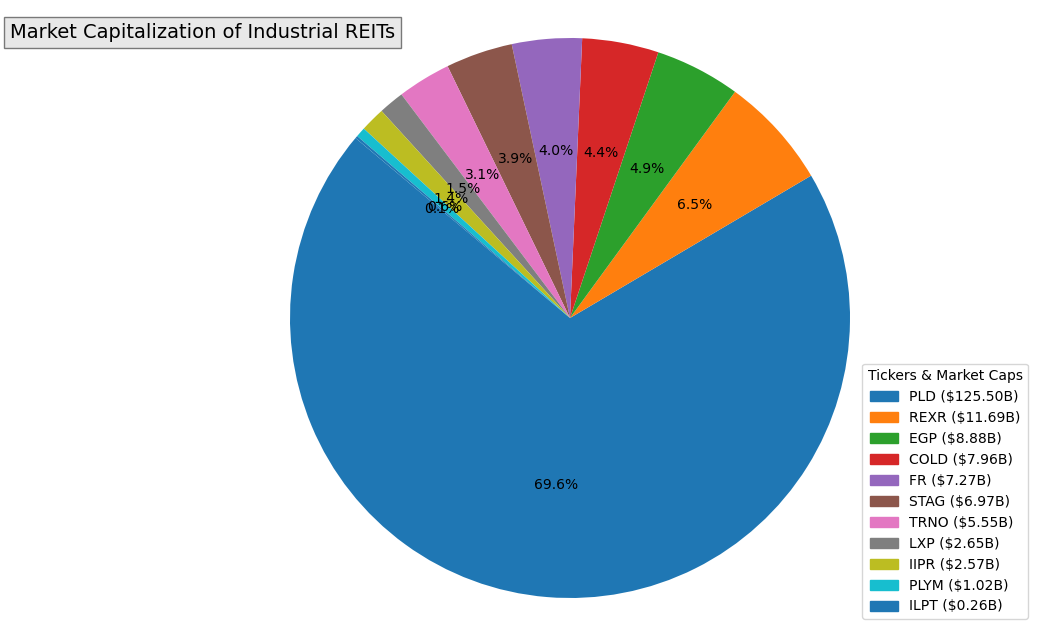

In [160]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# List of REIT tickers
reit_tickers = ['PLD', 'ILPT', 'PLYM', 'IIPR', 'LXP', 'TRNO', 'STAG', 'FR', 'EGP', 'COLD', 'REXR']

# Fetching market capitalization for each REIT
market_caps = {}
for ticker in reit_tickers:
    try:
        # Fetching data from Yahoo Finance
        data = yf.Ticker(ticker).info
        market_caps[ticker] = data['marketCap']
    except:
        print(f"Error fetching data for {ticker}")

# Filtering out REITs with missing market capitalization
market_caps = {ticker: cap for ticker, cap in market_caps.items() if cap is not None}

# Sorting REITs by market capitalization (descending order)
sorted_reits = sorted(market_caps.items(), key=lambda x: x[1], reverse=True)

# Extracting REIT tickers and market capitalizations
tickers = [ticker for ticker, _ in sorted_reits]
market_caps_values = [cap / 1e9 for _, cap in sorted_reits]  # Convert to $ billions

# Creating the pie chart without labels
plt.figure(figsize=(12, 8))
pie = plt.pie(market_caps_values, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Creating a custom legend with tickers, market capitalizations, and corresponding colors
legend_handles = []
for ticker, patch, cap in zip(tickers, pie[0], market_caps_values):
    legend_label = f'{ticker} (${cap:.2f}B)'
    legend_handles.append(mpatches.Patch(color=patch.get_facecolor(), label=legend_label))

# Adding legend with tickers, market capitalizations, and corresponding colors
plt.legend(handles=legend_handles, loc='lower right', title='Tickers & Market Caps')

# Adding title in a box on the top left
plt.text(-2, 1, 'Market Capitalization of Industrial REITs', fontsize=14, bbox=dict(facecolor='lightgray', alpha=0.5))

# Showing the pie chart
plt.show()


[*********************100%%**********************]  11 of 11 completed


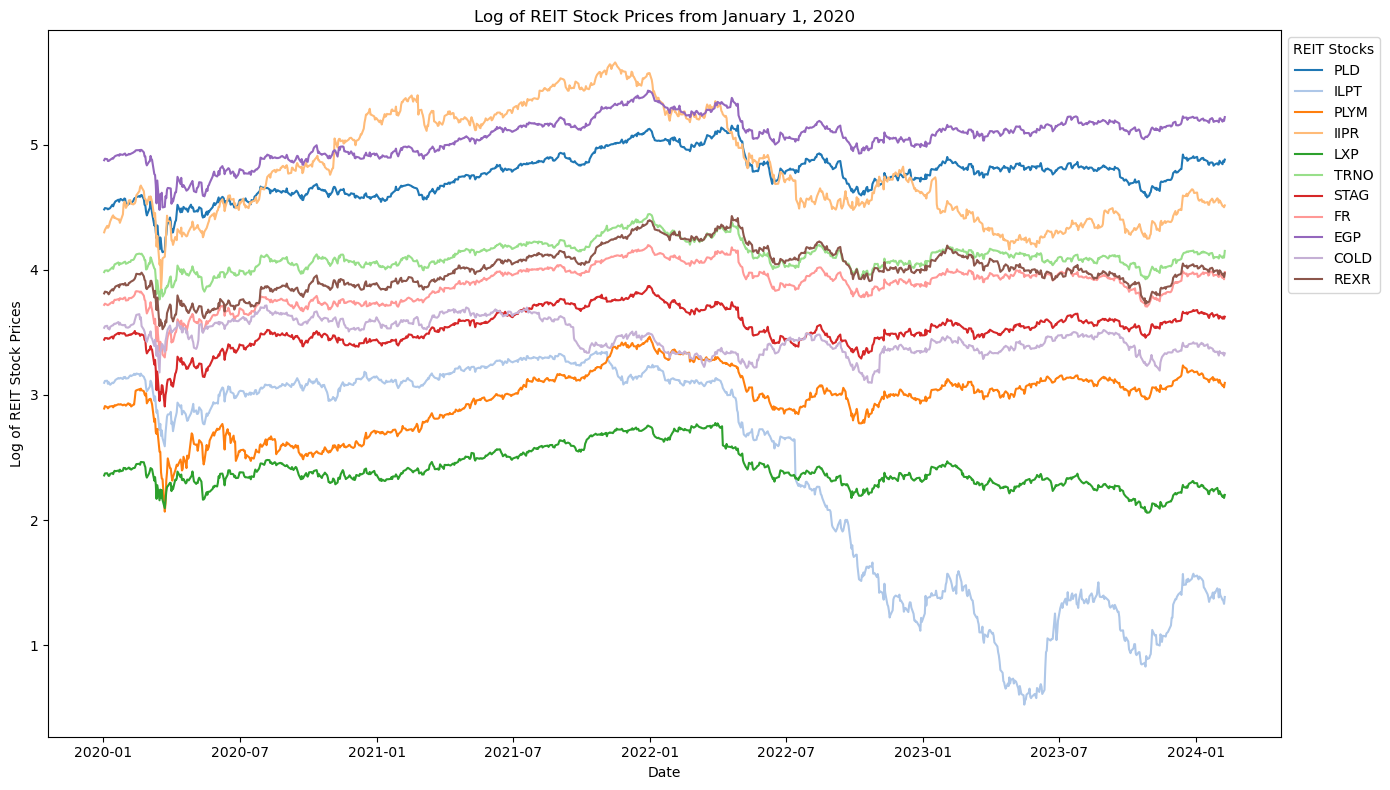

In [60]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # For calculating the logarithm

# List of REIT stocks to download
reit_stocks = ['PLD', 'ILPT', 'PLYM', 'IIPR', 'LXP', 'TRNO', 'STAG', 'FR', 'EGP', 'COLD', 'REXR']

# Download stock data for all REITs in the list
stock_data = yf.download(reit_stocks, start='2020-01-01', end='2024-02-09')['Close']

# Calculate the log of the stock prices
log_stock_prices = np.log(stock_data)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for each REIT for clarity in the plot
colors = plt.cm.tab20(range(len(reit_stocks)))

for (stock, color) in zip(reit_stocks, colors):
    ax.plot(log_stock_prices.index, log_stock_prices[stock], label=stock, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Log of REIT Stock Prices')
ax.tick_params(axis='y')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="REIT Stocks")

# Final adjustments
plt.title('Log of REIT Stock Prices from January 1, 2020')
fig.tight_layout()
plt.show()


[*********************100%%**********************]  11 of 11 completed


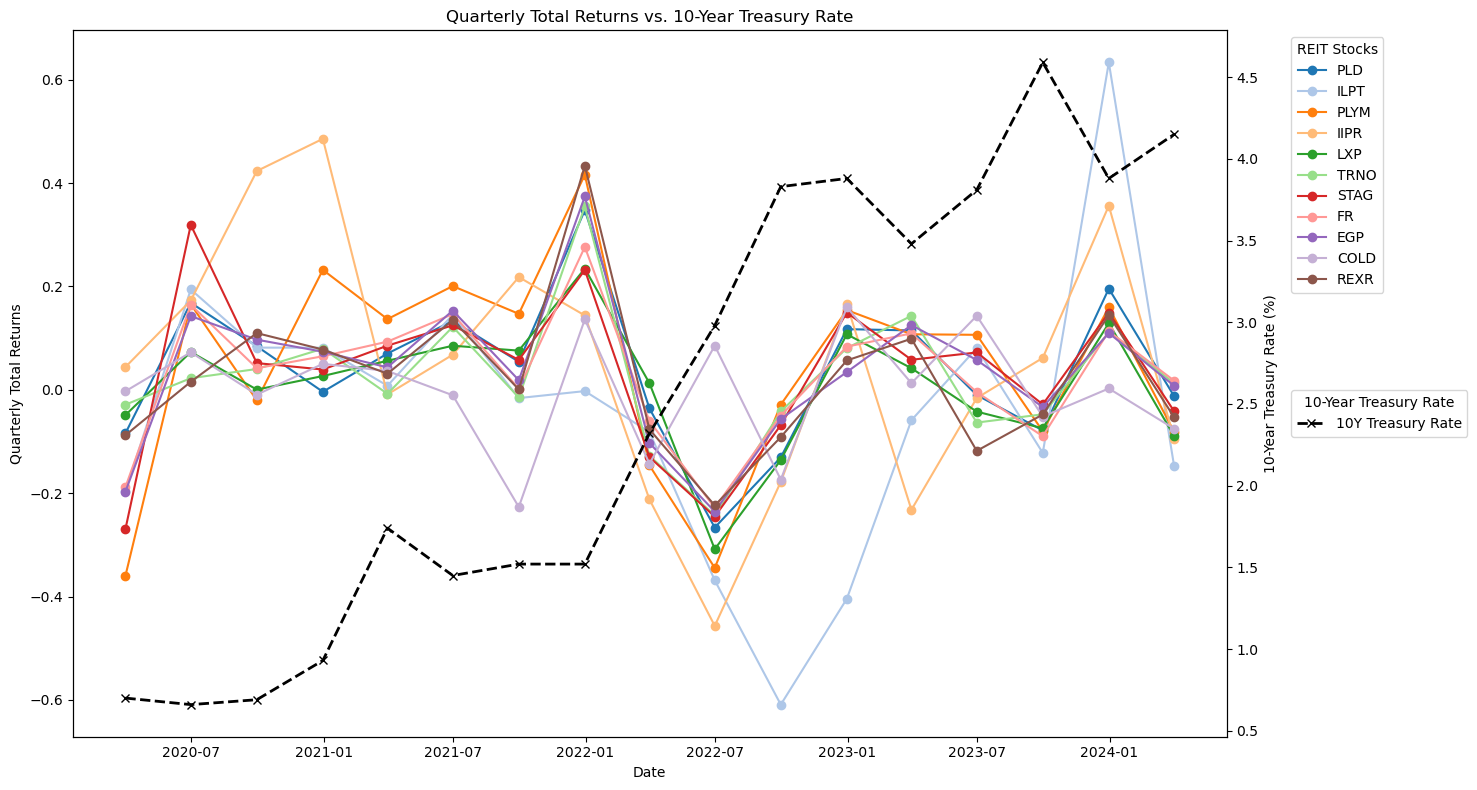

In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Fetch economic indicator data from FRED
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')


# List of REIT stocks to download
reit_stocks = ['PLD', 'ILPT', 'PLYM', 'IIPR', 'LXP', 'TRNO', 'STAG', 'FR', 'EGP', 'COLD', 'REXR']

# Download stock data for all REITs in the list, including dividends
stock_data_with_dividends = yf.download(reit_stocks, start='2020-01-01', end='2024-02-09', actions='inline')

# Calculate adjusted close for total returns, including dividends
adjusted_close = stock_data_with_dividends['Close'].fillna(method='ffill')  # Forward fill any missing close prices
dividends = stock_data_with_dividends['Dividends'].fillna(0)  # Fill missing dividend values with 0

# Calculate daily returns including dividends
daily_returns = adjusted_close.pct_change() + dividends/adjusted_close.shift(1)

# Resample daily returns to quarterly and calculate quarterly total returns
quarterly_total_returns = (1 + daily_returns).resample('Q').prod() - 1

# Fetch the 10-year Treasury rate data and resample it quarterly
ten_year_treasury_rate = fred.get_series('DGS10', observation_start='2020-01-01', observation_end='2024-02-09')
ten_year_treasury_rate_df = ten_year_treasury_rate.to_frame(name='10Y Treasury Rate').resample('Q').last()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Colors for each REIT for clarity in the plot
colors = plt.cm.tab20(range(len(reit_stocks)))

for (stock, color) in zip(reit_stocks, colors):
    ax1.plot(quarterly_total_returns.index, quarterly_total_returns[stock], label=stock, color=color, marker='o')

ax1.set_xlabel('Date')
ax1.set_ylabel('Quarterly Total Returns')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="REIT Stocks")

# Create a second y-axis for 10-year Treasury rate
ax2 = ax1.twinx()
color = 'black'  # Color for 10-year Treasury rate
ax2.plot(ten_year_treasury_rate_df.index, ten_year_treasury_rate_df['10Y Treasury Rate'], label='10Y Treasury Rate', color=color, linewidth=2, linestyle='--', marker='x')
ax2.set_ylabel('10-Year Treasury Rate (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Final adjustments
plt.title('Quarterly Total Returns vs. 10-Year Treasury Rate')
fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5), title="10-Year Treasury Rate")
plt.show()


[*********************100%%**********************]  11 of 11 completed


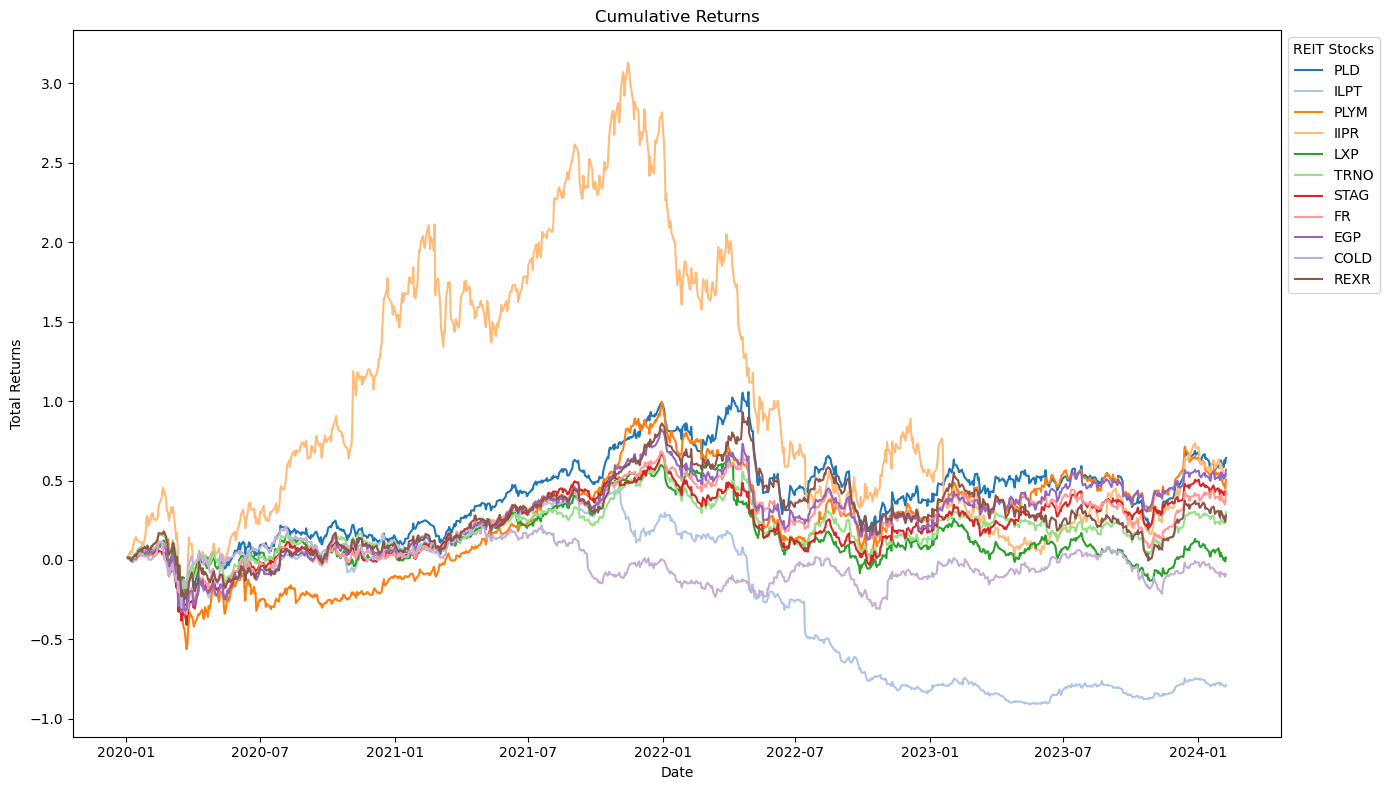

In [56]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of REIT stocks to download
reit_stocks = ['PLD', 'ILPT', 'PLYM', 'IIPR', 'LXP', 'TRNO', 'STAG', 'FR', 'EGP', 'COLD', 'REXR']

# Download stock data for all REITs in the list, including dividends
stock_data_with_dividends = yf.download(reit_stocks, start='2020-01-01', end='2024-02-09', actions='inline')

# Calculate adjusted close for total returns, including dividends
adjusted_close = stock_data_with_dividends['Close'].fillna(method='ffill')  # Forward fill any missing close prices
dividends = stock_data_with_dividends['Dividends'].fillna(0)  # Fill missing dividend values with 0

# Calculate daily returns including dividends
daily_returns = adjusted_close.pct_change() + dividends / adjusted_close.shift(1)
# Calculate cumulative total returns
cumulative_total_returns = (1 + daily_returns).cumprod() - 1

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Colors for each REIT for clarity in the plot
colors = plt.cm.tab20(range(len(reit_stocks)))

for (stock, color) in zip(reit_stocks, colors):
    ax.plot(cumulative_total_returns.index, cumulative_total_returns[stock], label=stock, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Total Returns')
ax.tick_params(axis='y')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="REIT Stocks")

# Final adjustments
plt.title('Cumulative Returns')
fig.tight_layout()
plt.show()


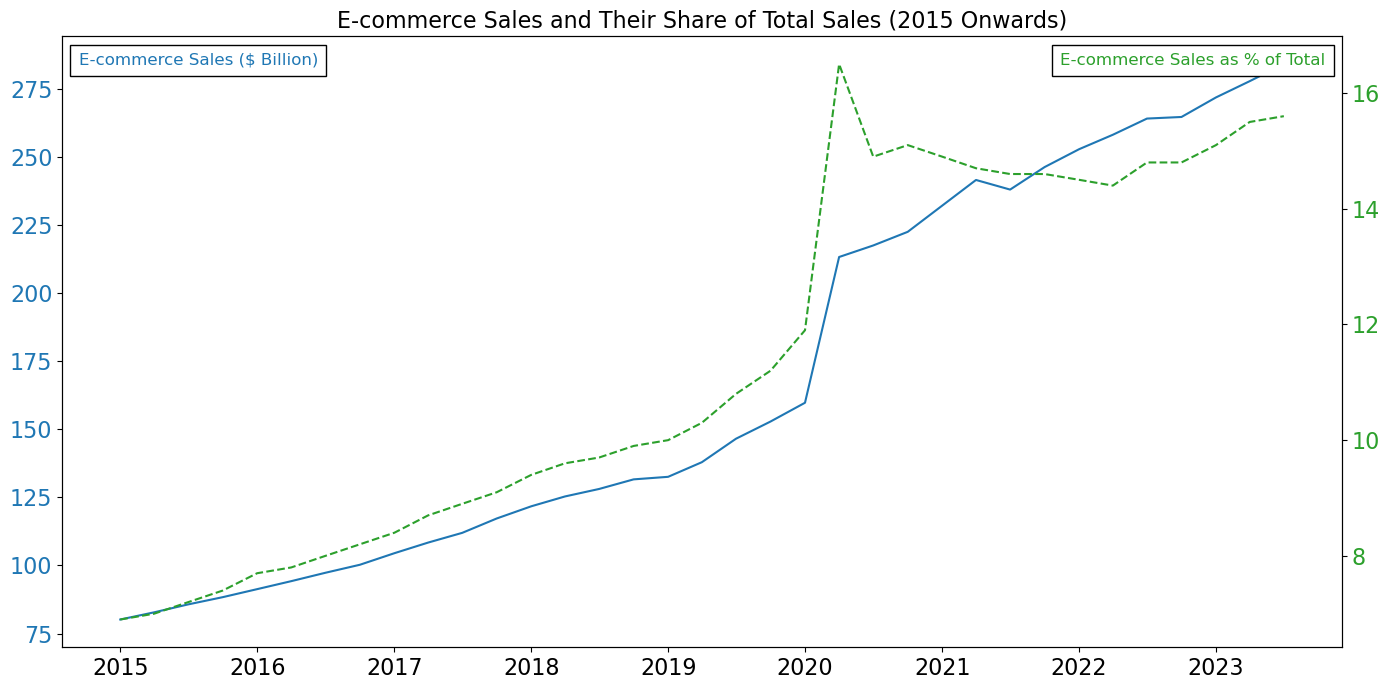

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from matplotlib.offsetbox import AnchoredText

# Initialize Fred API with your API key
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')

# Fetch the data, starting from 2015
e_commerce_sales = fred.get_series('ECOMSA', observation_start='2015-01-01')  # E-commerce sales
e_commerce_pct_of_total = fred.get_series('ECOMPCTSA', observation_start='2015-01-01')  # E-commerce as a percent of total sales

# Convert e-commerce sales from millions to billions of dollars
e_commerce_sales_billion = e_commerce_sales / 1000

# Creating figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Customizing tick label size
tick_label_fontsize = 16  # Adjust fontsize as needed

# Plotting the e-commerce sales on the primary y-axis in billions of dollars
color = 'tab:blue'
ax1.plot(e_commerce_sales_billion.index, e_commerce_sales_billion, color=color, label='E-commerce Sales ($ Billion)')
ax1.tick_params(axis='y', labelcolor=color, labelsize=tick_label_fontsize)
ax1.tick_params(axis='x', labelsize=tick_label_fontsize)

# Adding axis title using text box for the primary y-axis
text_box1 = AnchoredText('E-commerce Sales ($ Billion)', loc='upper left', frameon=True, pad=0.5, prop=dict(size=12, color=color))
ax1.add_artist(text_box1)

# Creating a second y-axis for the percentage of total sales
ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(e_commerce_pct_of_total.index, e_commerce_pct_of_total, color=color, linestyle='--', label='E-commerce % of Total')
ax2.tick_params(axis='y', labelcolor=color, labelsize=tick_label_fontsize)

# Adding axis title using text box for the secondary y-axis
text_box2 = AnchoredText('E-commerce Sales as % of Total', loc='upper right', frameon=True, pad=0.5, prop=dict(size=12, color=color))
ax2.add_artist(text_box2)

# Adjusting layout and adding title
plt.title('E-commerce Sales and Their Share of Total Sales (2015 Onwards)', fontsize=16)
fig.tight_layout()

plt.show()

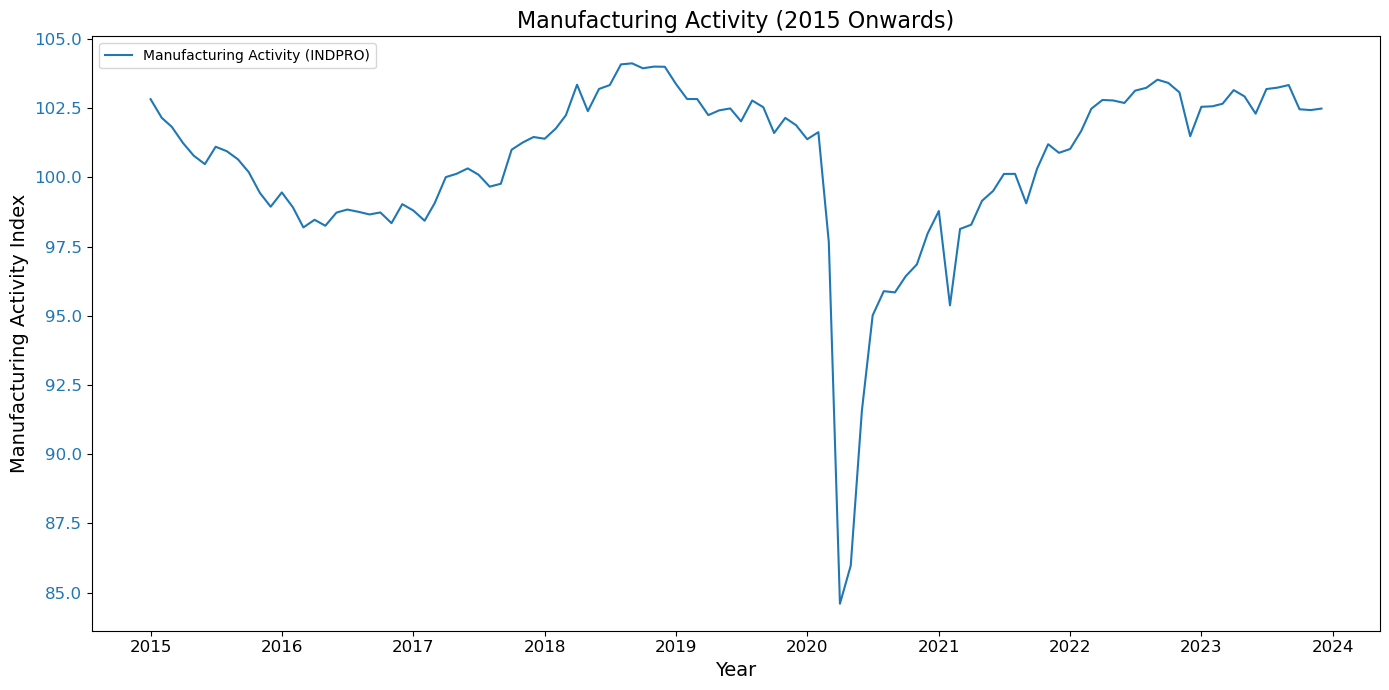

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize Fred API with your API key
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')

# Fetch the manufacturing activity data, starting from 2015
manufacturing_activity = fred.get_series('INDPRO', observation_start='2015-01-01')

# Creating figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the manufacturing activity
ax.plot(manufacturing_activity.index, manufacturing_activity, label='Manufacturing Activity (INDPRO)', color='tab:blue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Manufacturing Activity Index', fontsize=14)
ax.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend(loc='upper left')

# Title and layout adjustments
plt.title('Manufacturing Activity (2015 Onwards)', fontsize=16)
plt.tight_layout()

plt.show()


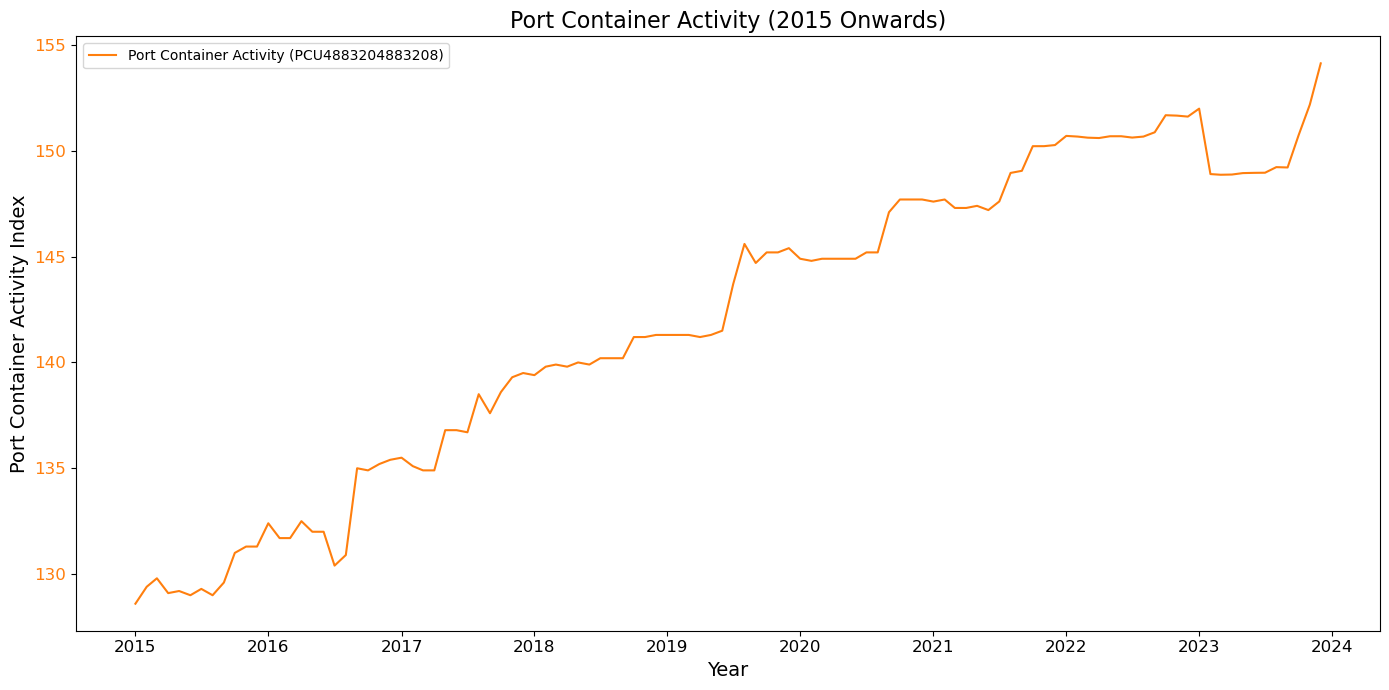

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize Fred API with your API key
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')

# Fetch the port container activity data (PCU4883204883208), starting from 2015
port_container_activity = fred.get_series('PCU4883204883208', observation_start='2015-01-01')

# Creating figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the port container activity
ax.plot(port_container_activity.index, port_container_activity, label='Port Container Activity (PCU4883204883208)', color='tab:orange')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Port Container Activity Index', fontsize=14)
ax.tick_params(axis='y', labelcolor='tab:orange', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.legend(loc='upper left')

# Title and layout adjustments
plt.title('Port Container Activity (2015 Onwards)', fontsize=16)
plt.tight_layout()

plt.show()


In [26]:
!pip install yfinance
!pip install pandas 
!pip install matplotlib
!pip install fredapi

# Fetch economic indicator data from FRED
fred = Fred(api_key='d7070f8d370642a1cb9592fa67f999d7')

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
